https://school.programmers.co.kr/learn/courses/30/lessons/60062

레스토랑의 구조는 완전히 동그란 모양이고 외벽의 총 둘레는 n미터이며, 외벽의 몇몇 지점은 추위가 심할 경우 손상될 수도 있는 취약한 지점들이 있다. 따라서 내부 공사 도중에도 외벽의 취약 지점들이 손상되지 않았는지, 주기적으로 친구들을 보내서 점검을 하기로 했다. 다만, 빠른 공사 진행을 위해 점검 시간을 1시간으로 제한했다. 친구들이 1시간 동안 이동할 수 있는 거리는 제각각이기 때문에, 최소한의 친구들을 투입해 취약 지점을 점검하고 나머지 친구들은 내부 공사를 돕도록 하려 한다. 편의상 레스토랑의 정북 방향 지점을 0으로 나타내며, 취약 지점의 위치는 정북 방향 지점으로부터 시계 방향으로 떨어진 거리로 나타낸다. 또, 친구들은 출발 지점부터 시계, 혹은 반시계 방향으로 외벽을 따라서만 이동한다.

외벽의 길이 n, 취약 지점의 위치가 담긴 배열 weak, 각 친구가 1시간 동안 이동할 수 있는 거리가 담긴 배열 dist가 매개변수로 주어질 때, 취약 지점을 점검하기 위해 보내야 하는 친구 수의 최솟값을 return 하도록 solution 함수를 완성하시오.

제한 조건 )
- n은 1 이상 200 이하인 자연수이다.
- weak의 길이는 1 이상 15 이하이다.
    * 서로 다른 두 취약점의 위치가 같은 경우는 주어지지 않는다.
    * 취약 지점의 위치는 오름차순으로 정렬되어 주어진다.
    * weak의 원소는 0 이상 n-1 이하인 정수이다.
- dist의 길이는 1 이상 8 이하이다.
    * dist의 원소는 1 이상 100 이하인 자연수이다.
- 친구들을 모두 투입해도 취약 지점을 전부 점검할 수 없는 경우에는 -1을 return 반환

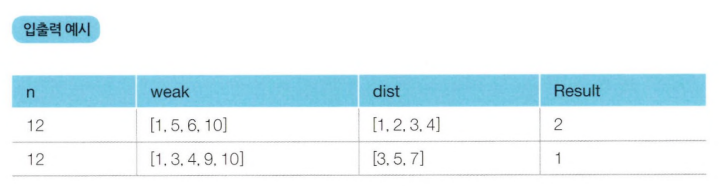

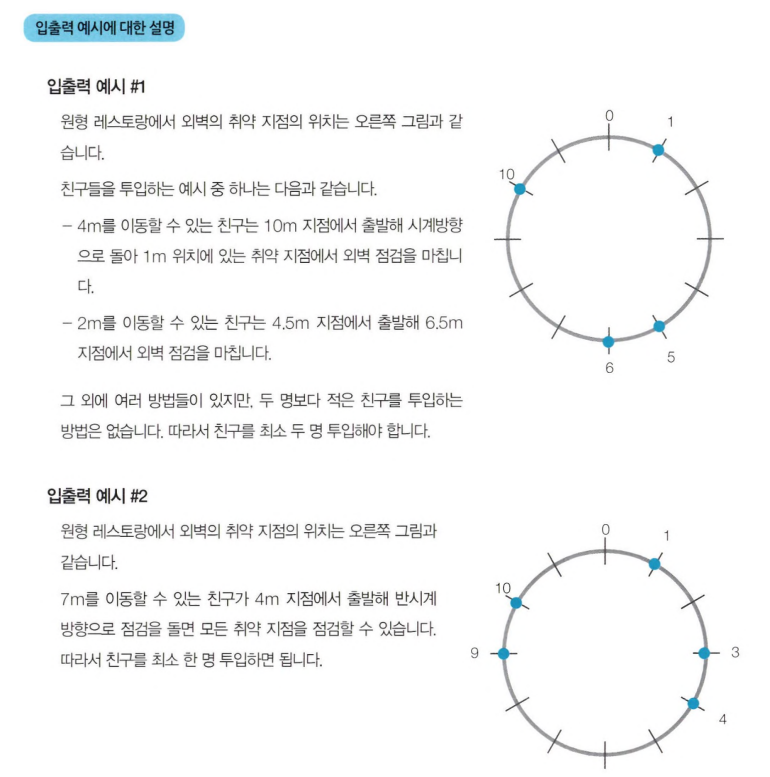

In [4]:
n = int(input())
weak = list(map(int, input().split()))
dist = list(map(int, input().split()))

12
1 5 6 10
1 2 3 4


In [8]:
from itertools import permutations 

def solution(n, weak, dist):
    # 길이를 2배로 늘려 원형 -> 일자로 변경
    length = len(weak)
    for i in range(length) :
        weak.append(weak[i] + n)  # 1 5 6 10 13 17 18 22
        
    answer = len(dist) + 1  # 투입할 친구 수 초기화
    
    
    # 0부터 length - 1까지의 위치를 각각 시작점으로 설정
    for start in range(length) :
        # 친구를 나열하는 모든 경우의 수 각각에 대하여 확인
        for friends in list(permutations(dist, len(dist))) :
            count = 1  # 투입할 친구의 수
            # 해당 친구가 점검할 수 있는 마지막 위치
            position = weak[start] + friends[count - 1]
            
            # 시작점부터 모든 취약 지점을 확인
            for index in range(start, start + length) :
                # 점검할 수 있는 위치 벗어나는 경우
                if position < weak[index] :
                    count += 1 # 친구 추가
                    if count > len(dist) : # 더 투입 불가능하다면 종료
                        break
                    # 마지막까지 확인된 위치 업데이트
                    position = weak[index] + friends[count-1]
                    
            answer = min(answer, count)
            
    if answer > len(dist) : # 모든 친구들 투입해도 탐색하기 어려운 경우
        return -1
    
    return answer

In [7]:
# permutations
from itertools import permutations 

list(permutations([1, 2, 3], 3))

[(1, 2, 3), (1, 3, 2), (2, 1, 3), (2, 3, 1), (3, 1, 2), (3, 2, 1)]

In [9]:
solution(n, weak, dist)

2